<a href="https://colab.research.google.com/github/mickee00000/Research_Internship/blob/main/Text%20Extraction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import PIL
import os
import cv2
import pathlib

In [4]:
hindi_data = tf.keras.utils.get_file('hindi_text', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip', cache_dir='.', extract=True, archive_format='zip')
hindi_data

'./datasets/hindi_text'

In [5]:
hindi_data_train = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Train')
hindi_data_train

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Train')

In [6]:
hindi_data_test = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Test')
hindi_data_test

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Test')

In [7]:
image_count = len(list(hindi_data_train.glob('*/*.png')))
image_count

78200

In [8]:
len(list(hindi_data_train.glob('character_3_ga/*')))

1700

In [9]:
hindi_letters_dict_train = {
    'sa': list(hindi_data_train.glob('character_32_patalosaw/*')),
    're': list(hindi_data_train.glob('character_27_ra/*')),
    'ga': list(hindi_data_train.glob('character_3_ga/*')),
    'ma': list(hindi_data_train.glob('character_25_ma/*')),
    'pa': list(hindi_data_train.glob('character_21_pa/*')),
    'dha': list(hindi_data_train.glob('character_19_dha/*')),
    'ni': list(hindi_data_train.glob('character_20_na/*')),
    'zero': list(hindi_data_train.glob('digit_0/*')),
    'one': list(hindi_data_train.glob('digit_1/*')),
    'two': list(hindi_data_train.glob('digit_2/*')),
    'three': list(hindi_data_train.glob('digit_3/*')),
    'four': list(hindi_data_train.glob('digit_4/*')),
    'five': list(hindi_data_train.glob('digit_5/*')),
    'six': list(hindi_data_train.glob('digit_6/*')),
    'seven': list(hindi_data_train.glob('digit_7/*')),
    'eight': list(hindi_data_train.glob('digit_8/*')),
    'nine': list(hindi_data_train.glob('digit_9/*')),
}

In [10]:
hindi_letters_dict_test = {
    'sa': list(hindi_data_test.glob('character_32_patalosaw/*')),
    're': list(hindi_data_test.glob('character_27_ra/*')),
    'ga': list(hindi_data_test.glob('character_3_ga/*')),
    'ma': list(hindi_data_test.glob('character_25_ma/*')),
    'pa': list(hindi_data_test.glob('character_21_pa/*')),
    'dha': list(hindi_data_test.glob('character_19_dha/*')),
    'ni': list(hindi_data_test.glob('character_20_na/*')),
    'zero': list(hindi_data_test.glob('digit_0/*')),
    'one': list(hindi_data_test.glob('digit_1/*')),
    'two': list(hindi_data_test.glob('digit_2/*')),
    'three': list(hindi_data_test.glob('digit_3/*')),
    'four': list(hindi_data_test.glob('digit_4/*')),
    'five': list(hindi_data_test.glob('digit_5/*')),
    'six': list(hindi_data_test.glob('digit_6/*')),
    'seven': list(hindi_data_test.glob('digit_7/*')),
    'eight': list(hindi_data_test.glob('digit_8/*')),
    'nine': list(hindi_data_test.glob('digit_9/*')),
}

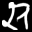

In [11]:
PIL.Image.open(hindi_letters_dict_train['sa'][0])

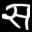

In [12]:
PIL.Image.open(hindi_letters_dict_train['sa'][5])

In [13]:
hindi_label_dict = {
    'sa': 10,
    're': 11,
    'ga': 12,
    'ma': 13,
    'pa': 14,
    'dha': 15,
    'ni': 16,
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
}

In [14]:
hindi_name_dict = {
     10: 'sa',
     11: 're',
     12: 'ga',
     13: 'ma',
     14: 'pa',
     15: 'dha',
     16: 'ni',
     0: 'zero',
     1: 'one',
     2: 'two',
     3: 'three',
     4: 'four',
     5: 'five',
     6: 'six',
     7: 'seven',
     8: 'eight',
     9: 'nine',
}

In [15]:
img = cv2.imread(str(hindi_letters_dict_train['re'][0]))


In [16]:
img

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [93, 93, 93],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [17]:
X_train = []
y_train = []

In [18]:
for key, value_list in hindi_letters_dict_train.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_train.append(img)
        y_train.append(hindi_label_dict[key])

In [19]:
X_test = []
y_test = []

In [20]:
for key, value_list in hindi_letters_dict_test.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_test.append(img)
        y_test.append(hindi_label_dict[key])

In [21]:
len(X_train)

28900

In [22]:
len(y_train)

28900

In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [24]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
X_train.shape

(28900, 32, 32, 3)

In [26]:
X_test.shape

(5100, 32, 32, 3)

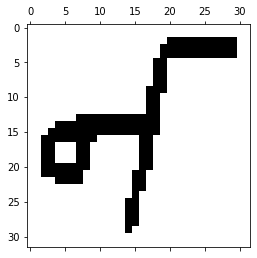

In [27]:
plt.matshow(X_train[11110])

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [29]:
hindi_name_dict[y_train[11110]]

'ni'

In [30]:
X_train_scaled.shape

(28900, 32, 32, 3)

In [31]:
#X_train_scaled_flat = np.reshape(#X_train_scaled, (28900, 32*32*3))

In [32]:
y_train[0]

10

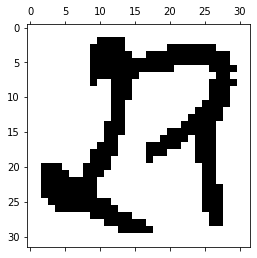

In [33]:
plt.matshow(X_train[0])

In [34]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
      
    ]
)

In [35]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(17,activation = "softmax"),

])

In [36]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [37]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)      

In [38]:
model.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
904/904 [==============================] - 10s 7ms/step - loss: 1.2603 - accuracy: 0.6016
Epoch 2/50
904/904 [==============================] - 6s 7ms/step - loss: 0.6051 - accuracy: 0.8012
Epoch 3/50
904/904 [==============================] - 7s 8ms/step - loss: 0.4496 - accuracy: 0.8520
Epoch 4/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3748 - accuracy: 0.8793
Epoch 5/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3200 - accuracy: 0.8966
Epoch 6/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2885 - accuracy: 0.9043
Epoch 7/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2542 - accuracy: 0.9169
Epoch 8/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2577 - accuracy: 0.9167
Epoch 9/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2296 - accuracy: 0.9247
Epoch 10/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2170 - accuracy: 0.929

In [40]:
model.evaluate(X_test_scaled, y_test)

160/160 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9812


[0.06019900366663933, 0.981176495552063]